<a href="https://colab.research.google.com/github/Artem531/COS_lab1/blob/master/%D0%A6%D0%9E%D0%A1_%D0%BB%D0%B0%D0%B1%D0%B01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Напоминалка
1) См формулу 1.72
2) Ее можно считать циклом по n или по t

циклом по n я реализовал первые 2
циклом по t я реализовал последние 2

не забудь:
Объяснение на массивах для n и t
j*dt это время
Td в изобрадении =1





[0.         0.66666667 1.33333333 2.         2.66666667 3.33333333
 4.         4.66666667 5.33333333 6.         6.66666667 7.33333333
 8.         8.66666667 9.33333333]


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


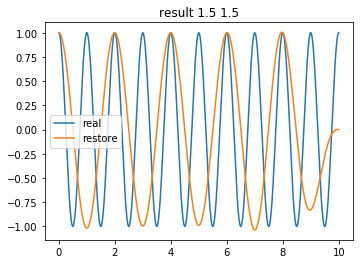

[[1.00000000e+00 9.99939146e-01 9.99869636e-01 ... 1.24854313e-04
  8.44775995e-05 4.28564690e-05]]
[0.         0.58823529 1.17647059 1.76470588 2.35294118 2.94117647
 3.52941176 4.11764706 4.70588235 5.29411765 5.88235294 6.47058824
 7.05882353 7.64705882 8.23529412 8.82352941 9.41176471]


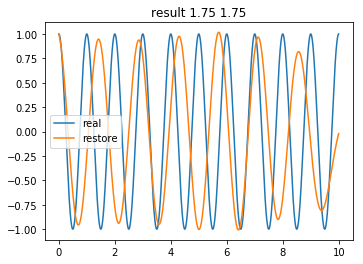

[[ 0.99843656  0.99738123  0.99631107 ... -0.02292068 -0.02186045
  -0.02080442]]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]


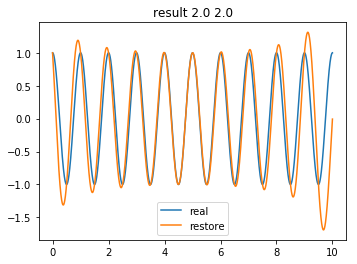

[[ 1.          0.9928916   0.98575752 ... -0.02164288 -0.01441619
  -0.00720183]]
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667
 2.         2.33333333 2.66666667 3.         3.33333333 3.66666667
 4.         4.33333333 4.66666667 5.         5.33333333 5.66666667
 6.         6.33333333 6.66666667 7.         7.33333333 7.66666667
 8.         8.33333333 8.66666667 9.         9.33333333 9.66666667]


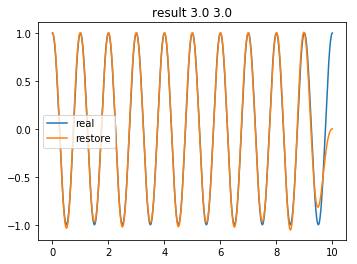

[[ 1.00000000e+00  1.00003604e+00  1.00003747e+00 ... -1.62573619e-04
  -1.03337644e-04 -4.91666953e-05]]
[0.000e+00 1.000e-03 2.000e-03 ... 9.997e+00 9.998e+00 9.999e+00]


KeyboardInterrupt: ignored

In [69]:
import numpy as np
import matplotlib.pyplot as plt

F = 1
T = 10/F
dt = 0.001
t = np.linspace(0, T, int(T/dt), endpoint=False)
#print(t)
u_t = np.sin(2*np.pi*F*t + np.pi/2)
#print(u_t)
mass_Fd = [1.5*F, 1.75*F, 2*F, 3*F, 1000*F]

#mass_Fd = [2*F]

for idx, Fd in enumerate(mass_Fd):
  Td = 1/(Fd)
  td = np.linspace(0, T, int(T/Td), endpoint=False)
  print(td)
  ud_t = np.sin(2*np.pi*F*td + np.pi/2)
  
  recovery = np.zeros((1, len(t)))
  for j in range(0, len(ud_t)):
    #print(td[j], ud_t[j])
    tmp = np.array([ i - td[j] for i in t])
    recovery += (np.sinc((tmp)/ Td)) * ud_t[j]
    #print(recovery) 
  plt.figure(figsize=[32, 4])
  plt.subplot(1, len(mass_Fd), idx + 1)
  plt.plot(t, u_t, label='real')
  plt.title('result ' + str(Fd / F))
  plt.grid()
  plt.legend()

  plt.subplot(1, len(mass_Fd), idx + 1)
  plt.plot(t, recovery[0], label='restore')
  plt.title('result ' + str(Fd / F) + ' ' + str(Fd / (10/T)))
  plt.grid()
  plt.legend()
  plt.show()
  print(recovery)
  #plt.plot(t, u_t)
  #plt.plot(t, recovery[0])

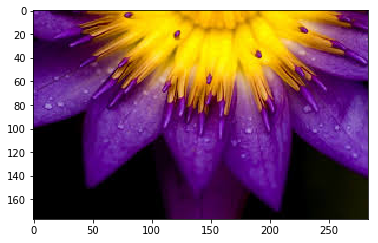

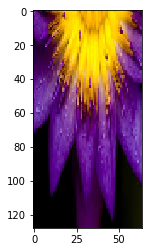

256


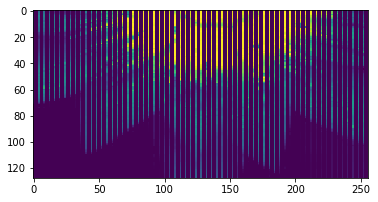

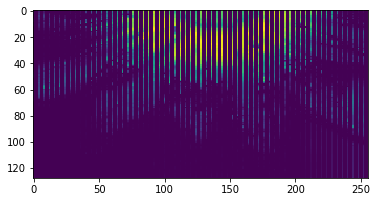

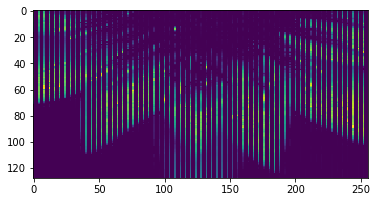

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


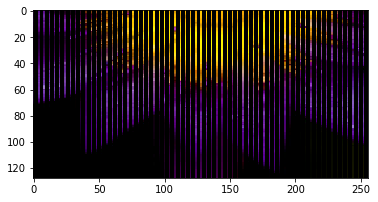

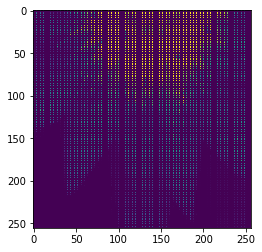

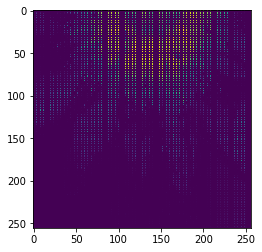

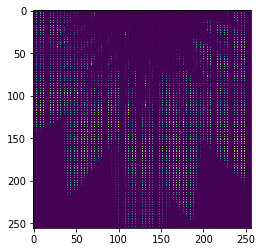

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


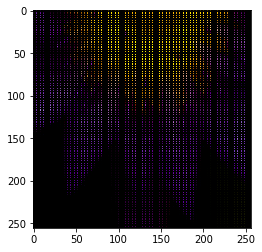

In [109]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

im1 = Image.open('download.jpg')

import matplotlib.pyplot as plt
plt.imshow(im1)
plt.show()

im1 = im1.resize((64, 128))
plt.imshow(im1)
plt.show()


# типо плохая дискретизированая картинка, хотя это оригинал
im = np.array(im1)

n = 2
m = 4

height, width, color = np.shape(im) 

new_W = int(width*m)
print(new_W)
resized_pixels = np.zeros((height,new_W,3))

for i in  range(0, height):
  red = im[i,:,0]
  green = im[i,:,1]
  blue = im[i,:,2]
  
  Td = 1
  td = np.linspace(0, width, int(width/Td), endpoint=False) 
  
  for j in range(0, width):
    u_res = np.sinc(np.array([ t - td[j]*m for t in range(int(new_W))]))
    resized_pixels[i,:,0] += red[j]*u_res
    resized_pixels[i,:,1] += green[j]*u_res
    resized_pixels[i,:,2] += blue[j]*u_res

plt.imshow(resized_pixels[:,:,0])
plt.show()
plt.imshow(resized_pixels[:,:,1])
plt.show()
plt.imshow(resized_pixels[:,:,2])
plt.show()

plt.imshow(resized_pixels/255)
#print(resized_pixels)
plt.show()

new_H = int(height * n)
result_pixels = np.zeros((new_H,new_W,3))

for i in  range(0, new_W):
  red = resized_pixels[:,i,0]
  green = resized_pixels[:,i,1]
  blue = resized_pixels[:,i,2]
  
  Td = 1
  td = np.linspace(0, height, int(height/Td), endpoint=False) 
  
  for j in range(0, height):
    u_res = np.sinc(np.array([ t - td[j]*n for t in range(int(new_H))]))
    result_pixels[:, i, 0] += red[j]*u_res
    result_pixels[:, i, 1] += green[j]*u_res
    result_pixels[:, i, 2] += blue[j]*u_res
  
    
plt.imshow(result_pixels[:,:,0])
plt.show()
plt.imshow(result_pixels[:,:,1])
plt.show()
plt.imshow(result_pixels[:,:,2])
plt.show()

plt.imshow(result_pixels/255)
#print(resized_pixels)
plt.show()  

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


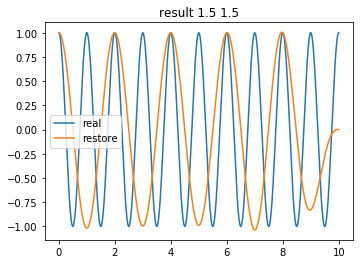

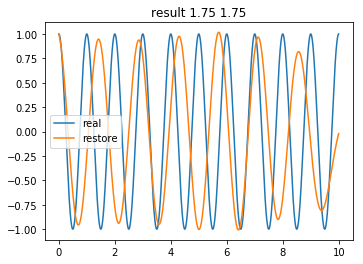

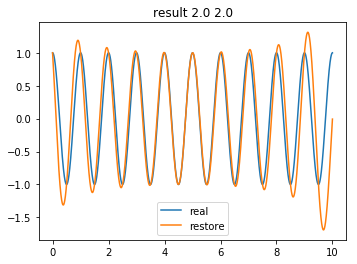

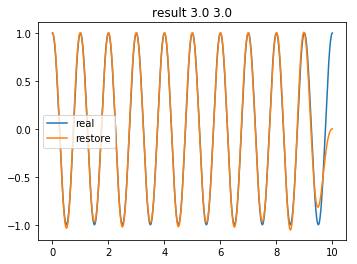

KeyboardInterrupt: ignored

In [100]:
import numpy as np
import matplotlib.pyplot as plt

F = 1
T = 10/F
dt = 0.001
t = np.linspace(0, T, int(T/dt), endpoint=False)
#print(t)
u_t = np.sin(2*np.pi*F*t + np.pi/2)
#print(u_t)
mass_Fd = [1.5*F, 1.75*F, 2*F, 3*F, 1000*F]

#mass_Fd = [3*F]

for idx, Fd in enumerate(mass_Fd):
  Td = 1/(Fd)
  td = np.linspace(0, T, int(T/Td), endpoint=False)
  #print(td)
  ud_t = np.sin(2*np.pi*F*td + np.pi/2)
  
  recovery = np.zeros((1, len(t)))
  for j in range(0, len(t)):
    #print(td[j], ud_t[j])
    
    # j*dt it is time
    tmp = np.array([j*dt - i for i in td])
    recovery[0, j] = np.sum(( np.sinc((tmp)/ Td)) * ud_t)
    #print(recovery) 
  plt.figure(figsize=[32, 4])
  plt.subplot(1, len(mass_Fd), idx + 1)
  plt.plot(t, u_t, label='real')
  plt.title('result ' + str(Fd / F))
  plt.grid()
  plt.legend()

  plt.subplot(1, len(mass_Fd), idx + 1)
  plt.plot(t, recovery[0], label='restore')
  plt.title('result ' + str(Fd / F) + ' ' + str(Fd / (10/T)))
  plt.grid()
  plt.legend()
  plt.show()
  #print(recovery)
  #plt.plot(t, u_t)
  #plt.plot(t, recovery[0])

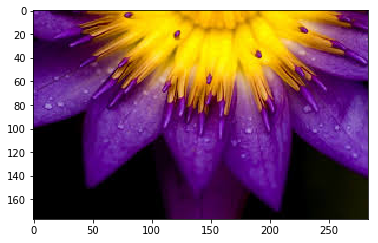

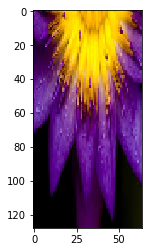

256


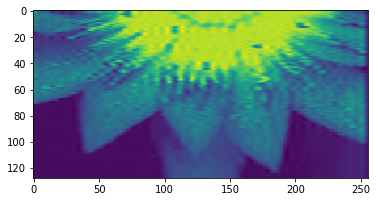

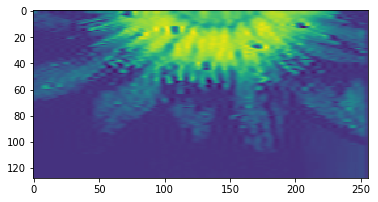

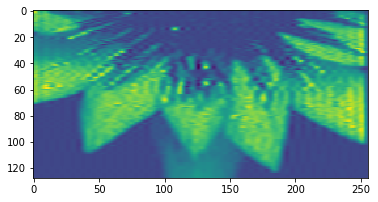

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


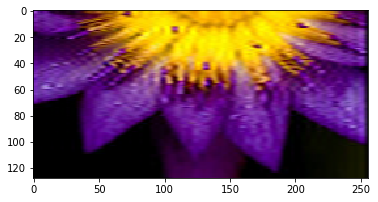

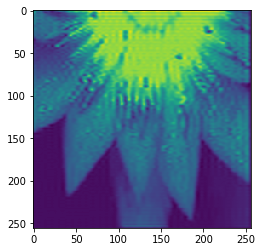

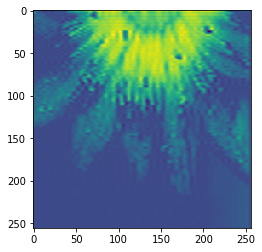

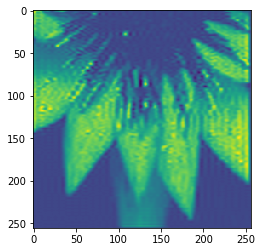

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


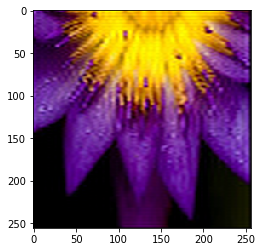

In [98]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

im1 = Image.open('download.jpg')

import matplotlib.pyplot as plt
plt.imshow(im1)
plt.show()

im1 = im1.resize((64, 128))
plt.imshow(im1)
plt.show()


# типо плохая дискретизированая картинка, хотя это оригинал
im = np.array(im1)

n = 2
m = 4

height, width, color = np.shape(im) 

new_W = int(width*m)
print(new_W)
resized_pixels = np.zeros((height,new_W,3))

for i in  range(0, height):
  red = im[i,:,0]
  green = im[i,:,1]
  blue = im[i,:,2]
  for j in range(0, new_W):
    # Td = 1
    u_res = np.sinc(np.array([j/m - w for w in range(int(width))]))
    resized_pixels[i,j,0] = np.sum(red*u_res)
    resized_pixels[i,j,1] = np.sum(green*u_res)
    resized_pixels[i,j,2] = np.sum(blue*u_res)

plt.imshow(resized_pixels[:,:,0])
plt.show()
plt.imshow(resized_pixels[:,:,1])
plt.show()
plt.imshow(resized_pixels[:,:,2])
plt.show()

plt.imshow(resized_pixels/255)
#print(resized_pixels)
plt.show()

new_H = int(height * n)
result_pixels = np.zeros((new_H,new_W,3))
for i in  range(0, new_W):
  red = resized_pixels[:,i,0]
  green = resized_pixels[:,i,1]
  blue = resized_pixels[:,i,2]
  for j in range(0, new_H):
    u_res = np.sinc(np.array([j/n - i for i in range(int(height))]))
    result_pixels[j,i,0] = np.sum(red*u_res)
    result_pixels[j,i,1] = np.sum(green*u_res)
    result_pixels[j,i,2] = np.sum(blue*u_res)
    
plt.imshow(result_pixels[:,:,0])
plt.show()
plt.imshow(result_pixels[:,:,1])
plt.show()
plt.imshow(result_pixels[:,:,2])
plt.show()

plt.imshow(result_pixels/255)
#print(resized_pixels)
plt.show()  

In [0]:
print( np.array([np.array(range(int(width * n))) -  np.array(uh_dt)]) )

ValueError: ignored